In [59]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-07-05 16:50:56--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  77.2MB/s    in 0.8s    

2021-07-05 16:50:57 (77.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [60]:
import os
import zipfile
local = '/tmp/cats_and_dogs_filtered.zip'
zip = zipfile.ZipFile(local, 'r')
zip.extractall('/tmp')
zip.close()

In [61]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')



In [62]:
validation_dir #quick check

'/tmp/cats_and_dogs_filtered/validation'

In [63]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [64]:
validation_cats_dir #quick check

'/tmp/cats_and_dogs_filtered/validation/cats'

In [65]:
# Try to find out the length of the diretories 
print("Length of cats used in training: ",len(os.listdir(train_cats_dir)))
print("Length of dogs used in training: ",len(os.listdir(train_dogs_dir)))
print("Length of cats used in validation: ",len(os.listdir(validation_cats_dir)))
print("Length of dogs used in validation: ",len(os.listdir(validation_dogs_dir)))

Length of cats used in training:  1000
Length of dogs used in training:  1000
Length of cats used in validation:  500
Length of dogs used in validation:  500


In [66]:
## Visualizing the images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#defining the plot

nrows = 4
ncols = 4

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [67]:
for fname in train_cat_fnames[0: 8]:
  print(fname)

cat.539.jpg
cat.142.jpg
cat.388.jpg
cat.452.jpg
cat.116.jpg
cat.39.jpg
cat.236.jpg
cat.101.jpg


In [68]:
cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[0:8]]

In [69]:
cat_pix

['/tmp/cats_and_dogs_filtered/train/cats/cat.539.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.142.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.388.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.452.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.116.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.39.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.236.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.101.jpg']

In [70]:
dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[0:8]]

In [71]:
dog_pix

['/tmp/cats_and_dogs_filtered/train/dogs/dog.456.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.713.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.264.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.222.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.818.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.193.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.769.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.944.jpg']

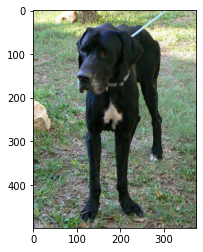

In [72]:
img =mpimg.imread(next_dog_pix[1])
plt.imshow(img)

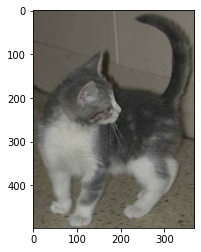

In [73]:
img =mpimg.imread(next_cat_pix[1])
plt.imshow(img)

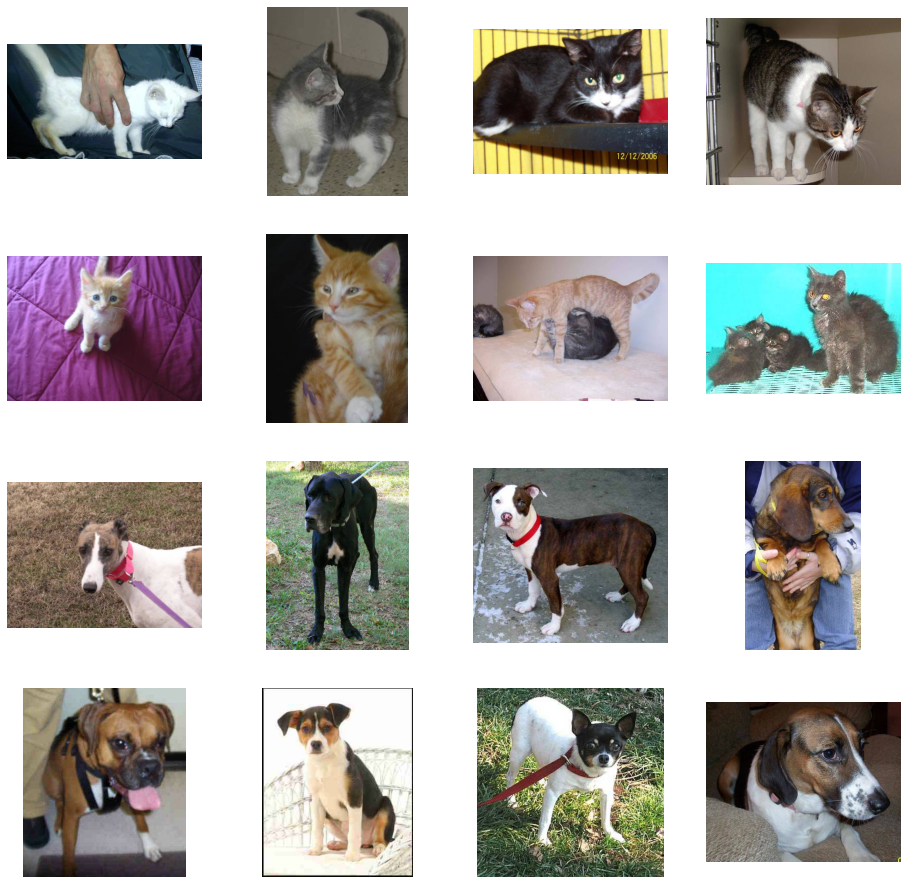

In [74]:
plt.figure(figsize=(16,16)) #figsize(nrows*4, ncols*4)
for i, path in enumerate(cat_pix+ dog_pix):
  ax = plt.subplot(nrows,ncols, i+1) #subplot starts with 0
  ax.axis('Off')
  img = mpimg.imread(path)
  plt.imshow(img)


In [ ]:
# defining a neaural entwork that will have a generous 150x150 dimension for images as they come in all shapes and sizes

In [97]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        73792     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [99]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [100]:
# data generators that will read pictures in our source folders,
#convert them to float32 tensors, and feed them (with their labels) to our network
#image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.0)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_gen = train_datagen.flow_from_directory(
    train_dir, batch_size = 20, class_mode = 'binary', target_size=(150,150)
)

validation_gen = validation_datagen.flow_from_directory(
    validation_dir, batch_size = 20, class_mode = 'binary', target_size=(150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [101]:
history = model.fit(train_gen,
                    validation_data = validation_gen,
                    steps_per_epoch = 100,
                    epochs = 15,
                    validation_steps = 50,
                    verbose =2)

Epoch 1/15
100/100 - 9s - loss: 0.8300 - accuracy: 0.5315 - val_loss: 0.6871 - val_accuracy: 0.5000
Epoch 2/15
100/100 - 8s - loss: 0.6970 - accuracy: 0.5910 - val_loss: 0.6606 - val_accuracy: 0.5960
Epoch 3/15
100/100 - 8s - loss: 0.6299 - accuracy: 0.6745 - val_loss: 0.5950 - val_accuracy: 0.6950
Epoch 4/15
100/100 - 8s - loss: 0.5442 - accuracy: 0.7225 - val_loss: 0.5917 - val_accuracy: 0.6930
Epoch 5/15
100/100 - 8s - loss: 0.4691 - accuracy: 0.7805 - val_loss: 0.6256 - val_accuracy: 0.6970
Epoch 6/15
100/100 - 8s - loss: 0.3866 - accuracy: 0.8410 - val_loss: 0.9197 - val_accuracy: 0.6540
Epoch 7/15
100/100 - 8s - loss: 0.2759 - accuracy: 0.8810 - val_loss: 0.8926 - val_accuracy: 0.6950
Epoch 8/15
100/100 - 8s - loss: 0.2353 - accuracy: 0.9130 - val_loss: 1.0984 - val_accuracy: 0.6930
Epoch 9/15
100/100 - 8s - loss: 0.1329 - accuracy: 0.9545 - val_loss: 0.9536 - val_accuracy: 0.7160
Epoch 10/15
100/100 - 8s - loss: 0.1092 - accuracy: 0.9720 - val_loss: 1.5992 - val_accuracy: 0.7090

Saving Screenshot 2021-07-04 234527.png to Screenshot 2021-07-04 234527.png
[0.]
Screenshot 2021-07-04 234527.png is a cat
